# Scraping to Plotting

### Introduction

Can you believe it?  We're ready to put everything together - scraping to plotting.  But really what we learned is the fundamentals of coding - lists, dictionaries, loops, nested data.  Once we have that down, plotting is just one of many tasks we can achive.  But we'll leave that for another day.  For now, let's plot those list of cities from the web.

### Collecting our Data

Let's think of what we need to do to create our plot.  We need to:

1. Collect our data from the web
2. Coerce our data into a Python list of dictionaries
3. Coerce our data into two lists of city populations and city names.
4. Plot this data


Remember how?  Use the pandas library to find the tables at a specified url.

In [2]:
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population'

tables = pd.read_html(url)

Our variable `tables` is just a list.

In [4]:
type(tables)

list

We want the element that has our table of US cities and populations, the element at index 4.

In [7]:
cities_table = tables[4]
cities_table[:2]

,2018rank,City,State[c],2018estimate,2010Census,Change,2016 land area,2016 land area.1,2016 population density,2016 population density.1,Location
0,1,New York[d],New York,8398748,8175133,+2.74%,301.5 sq mi,780.9 km2,"28,317/sq mi","10,933/km2",40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W
1,2,Los Angeles,California,3990456,3792621,+5.22%,468.7 sq mi,"1,213.9 km2","8,484/sq mi","3,276/km2",34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°W


Now we convert this table, to a list of dictionaries with the line: 

In [9]:
cities = cities_table.to_dict('records')
cities[:2]

[{'2018rank': 1,
  'City': 'New York[d]',
  'State[c]': 'New York',
  '2018estimate': 8398748,
  '2010Census': 8175133,
  'Change': '+2.74%',
  '2016 land area': '301.5\xa0sq\xa0mi',
  '2016 land area.1': '780.9\xa0km2',
  '2016 population density': '28,317/sq\xa0mi',
  '2016 population density.1': '10,933/km2',
  'Location': '40°39′49″N 73°56′19″W\ufeff / \ufeff40.6635°N 73.9387°W'},
 {'2018rank': 2,
  'City': 'Los Angeles',
  'State[c]': 'California',
  '2018estimate': 3990456,
  '2010Census': 3792621,
  'Change': '+5.22%',
  '2016 land area': '468.7\xa0sq\xa0mi',
  '2016 land area.1': '1,213.9\xa0km2',
  '2016 population density': '8,484/sq\xa0mi',
  '2016 population density.1': '3,276/km2',
  'Location': '34°01′10″N 118°24′39″W\ufeff / \ufeff34.0194°N 118.4108°W'}]

Ah, and there is our list of dictionaries.

### Go from a list of dictionaries to two lists

So there we have our list of dictionaries.  It can be overwhelming to look at all of that information, so let's just select the first dictionary, and examine the keys in that dictionary.

In [10]:
cities[0].keys()

dict_keys(['2018rank', 'City', 'State[c]', '2018estimate', '2010Census', 'Change', '2016 land area', '2016 land area.1', '2016 population density', '2016 population density.1', 'Location'])

Ok, so what we want here is the `2018estimate`, which has the population estimate, and we want the `City`, which has the city name.  How do we do that?

Well we loop through our list of cities, retrieving the `2018estimate` of each one, and adding it to a `populations` list.

In [14]:
populations = []
for city in cities:
    populations.append(city['2018estimate'])


Ok, now we'll just look at the first three populations to make sure we did it correctly.

In [18]:
populations[0:3]

[8398748, 3990456, 2705994]

Ok, now it's time to do the same thing to collect a list of city names.  Loop through our list of cities, and append in our city name.  We'll let you give this one a shot.  (You didn't think you'd get off so easy did you?)   Remember that the name is stored under the key of `City`.

In [16]:
city_names = []

for city in cities:
    city_names.append(city['City'])

In [19]:
city_names[0:3]

# ['New York[d]', 'Los Angeles', 'Chicago']

['New York[d]', 'Los Angeles', 'Chicago']

### Plotting our data

Great so now we have a list of `populations`, and a list of `city_names`.  Let's move through the steps of plotting our data.

First, we import our plotly library's graph_objects module and store it as `go`.

In [20]:
import plotly.graph_objects as go

Now we can practice creating a figure.

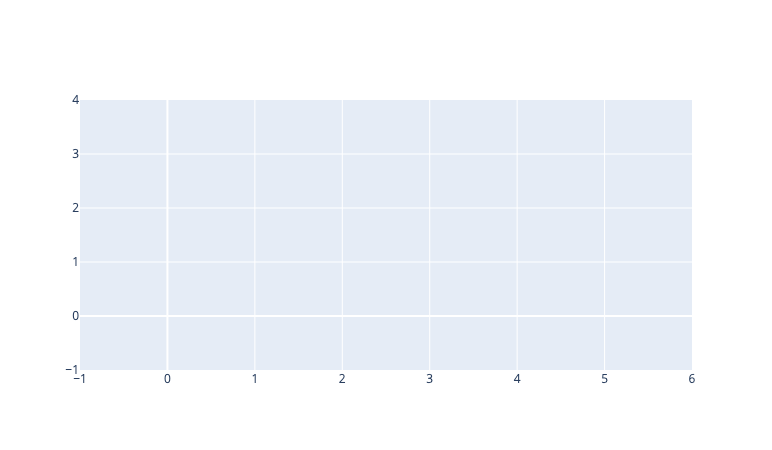

In [23]:
go.Figure()

But of course we would like to put a trace inside of our figure.  The trace should have the `y` values be the `populations`.  And the `hovertext` will be the list of cities.  

Here is how we gather the `city_names` and `populations`.

In [32]:
city_names = []

for city in cities:
    city_names.append(city['City'])
    
populations = []
for city in cities:
    populations.append(city['2018estimate'])


Now, below let's plot our data.

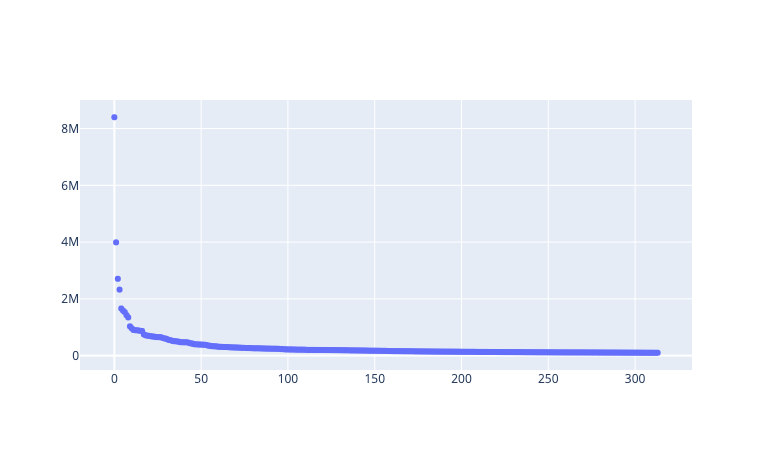

In [24]:
import plotly.graph_objects as go

cities_trace = go.Scatter(y = populations, mode = 'markers', hovertext = city_names)
go.Figure(cities_trace)

### Summary

In this lesson, we went through gathering data from the web, coercing that data into a list of populations and a list of names, to plotting that data in plotly.  This was our code.

First we gathered the data and coerced it into a list of dictionaries.

In [25]:
import pandas as pd
url = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population'

tables = pd.read_html(url)
cities_table = tables[4]
cities = cities_table.to_dict('records')

Then we went from the list of dictionaries to a list of populations and a list of cities.

In [29]:
populations = []
for city in cities:
    populations.append(city['2018estimate'])

In [31]:
city_names = []
for city in cities:
    city_names.append(city['City'])

And then we use plotly to display this data.

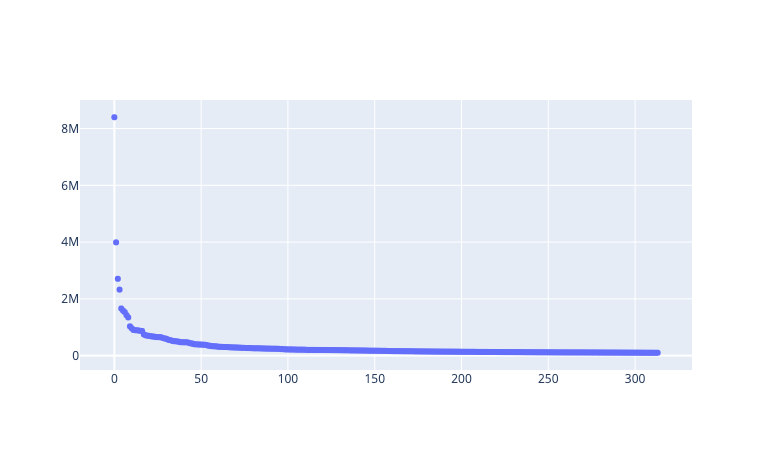

In [28]:
import plotly.graph_objects as go

cities_trace = go.Scatter(y = populations, mode = 'markers', hovertext = city_names)
go.Figure(cities_trace)